Found 5 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 1.0915 - val_accuracy: 0.3333 - val_loss: 1.1475
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - accuracy: 0.4000 - loss: 1.0085 - val_accuracy: 0.3333 - val_loss: 1.1533
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step - accuracy: 0.4000 - loss: 0.9915 - val_accuracy: 0.3333 - val_loss: 1.1445
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step - accuracy: 0.8000 - loss: 0.9445 - val_accuracy: 0.3333 - val_loss: 1.1322
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - accuracy: 0.8000 - loss: 0.8756 - val_accuracy: 0.3333 - val_loss: 1.1359


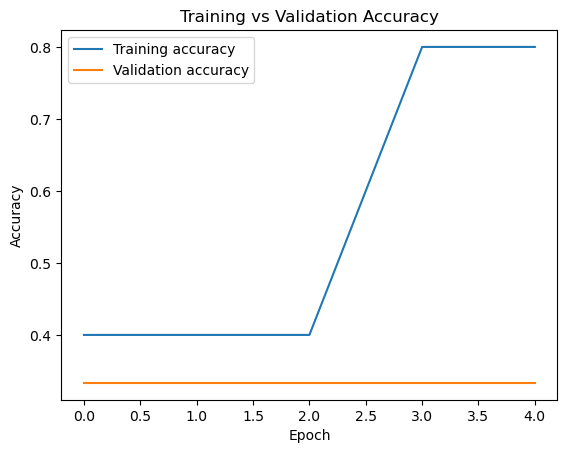

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_dir = r'E:\Emotions\Train'  
test_data_dir = r'E:\Emotions\Test'  

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),  # Resize the image to match model input
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Build a CNN model for emotion detection (no pre-trained weights)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') 
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


model.save('emotion_detection_model.keras')


plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
